In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [5]:
#Reading dataset
df=pd.read_csv ("height-weight.csv")

In [6]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'height')

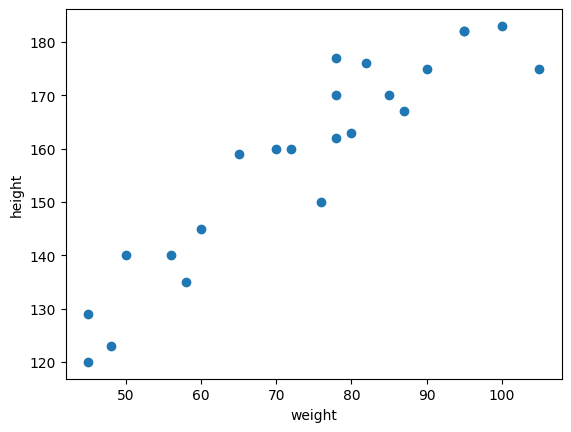

In [25]:
plt.scatter(df[["Weight"]],df["Height"])
plt.xlabel("weight")
plt.ylabel("height")

In [26]:
#Dividing the dataset into independent and dependent features
x=df[["Weight"]]#independent feature
y=df["Height"]#dependent feature


In [27]:
#train test split
from sklearn.model_selection import train_test_split

In [28]:
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.20,random_state=42)


In [29]:
x.shape

(23, 1)

In [30]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((18, 1), (5, 1), (18,), (5,))

In [31]:
#standarizing
from sklearn.preprocessing import StandardScaler

In [32]:
scaler=StandardScaler()

In [33]:
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

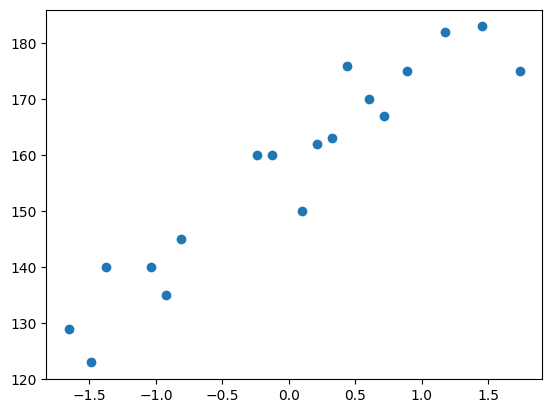

In [34]:
plt.scatter(x_train,y_train)

In [37]:
#training model
from sklearn.linear_model import LinearRegression

In [38]:
regressor=LinearRegression()

In [39]:
regressor.fit(x_train,y_train)
print("The slope or the coeffiecient of weight is",regressor.coef_)

The slope or the coeffiecient of weight is [17.03440872]


In [40]:
print("intercept is",regressor.intercept_)

intercept is 157.5


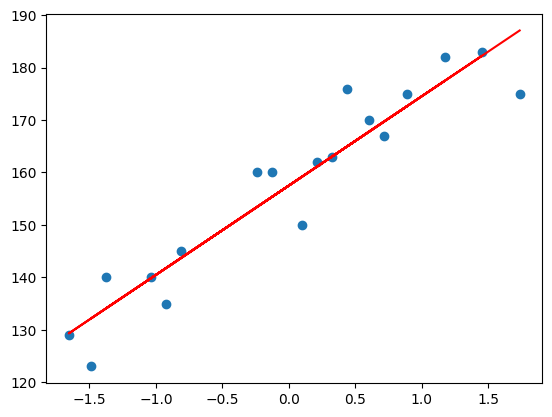

In [43]:
plt.scatter(x_train,y_train)
plt.plot(x_train,regressor.predict(x_train),"r")

In [44]:
#predicting
y_pred_test=regressor.predict(x_test)
y_pred_test,y_test

(array([161.08467086, 161.08467086, 129.3041561 , 177.45645118,
        148.56507414]),
 15    177
 9     170
 0     120
 8     182
 17    159
 Name: Height, dtype: int64)

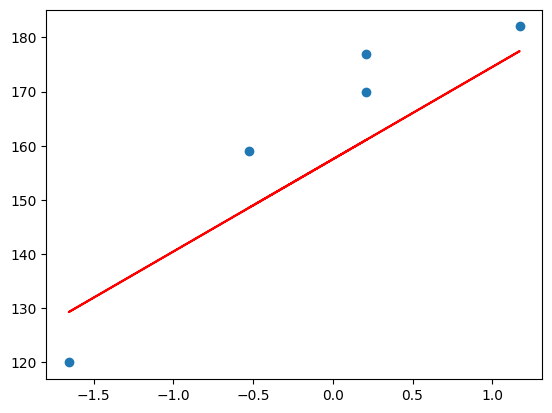

In [45]:
plt.scatter(x_test,y_test)
plt.plot(x_test,regressor.predict(x_test),"r")

In [46]:
#performance matrix
#mse,mae,rmse
#r square and adjusted r square
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [49]:
mse=mean_squared_error(y_test,y_pred_test)
mae=mean_absolute_error(y_test,y_pred_test)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

109.77592599051664
9.822657814519232
10.477400726827081


In [50]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred_test)
score

0.776986986042344

In [52]:
adj_r_square=1-(1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
print(adj_r_square)

0.7026493147231252


In [53]:
#now new data point weight is suppose 80
scaled_weight=scaler.transform([[80]])
scaled_weight

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.32350772]])

In [54]:
regressor.predict([scaled_weight[0]])

array([163.01076266])